<a href="https://colab.research.google.com/github/jskoda2/jskoda2/blob/main/NationalParks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal:


I will be conducting this exploration with the National Park Service in mind as a 'client'.

My aim is to understand camping reservation behavior by region in order to anticipate facility needs and inform marketing strategy.

# Dataset Description

This data comes from 'recreation.gov' and is a comprehensive archive of all recreational reservations made through government agencies such as the National Parks Service, US Forest Service, and the National Archives and Records Administration.

Goal: 

I will be conducting this exploration with the National Park Service in mind as a 'client'.


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set()

df = pd.read_csv('/content/drive/MyDrive/4. School/Thinkful - Data Analytics/Capstone 3/Data/FY21 Historical Reservations Full.csv') #import 2021 parks reservations
df.shape #the dimensions of this DataFrame


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,11,12,13,15,17,29,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(8354633, 35)

This dataset contains 35 columns and 8,354,633 rows.

In [ ]:
df.head(5) #preview the first three rows of the set

,historicalreservationid,ordernumber,agency,orgid,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,legacyfacilityid,...,totalbeforetax,discount,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,equipmentdescription,equipmentlength
0,edd9085a-a89f-4787-b9ec-e0794e5ac1b4,0201638440-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,58.0,0.0,58.0,2020-10-08 00:00:00.000,2020-10-10 00:00:00.000,2020-09-10 09:16:58.400,2 days,1.0,NaN,0.0
1,1d1d4d6a-3d57-47d0-9212-d9a4411555c0,0202157822-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,33.0,0.0,33.0,2020-10-23 00:00:00.000,2020-10-24 00:00:00.000,2020-09-28 23:22:18.538,1 day,2.0,NaN,0.0
2,bca72357-5824-4484-9eac-a824f5c00622,0208506393-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,33.0,0.0,33.0,2020-10-02 00:00:00.000,2020-10-03 00:00:00.000,2020-09-19 01:03:11.146,1 day,0.0,NaN,0.0
3,cbf1ce58-fb2a-4605-9474-cf27f1ce4052,0208506393-2,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,25.0,0.0,25.0,2020-10-03 00:00:00.000,2020-10-04 00:00:00.000,2020-09-19 01:03:11.146,1 day,2.0,NaN,0.0
4,b3e1899a-aa31-4948-8d47-29af5f6ea85f,0217769313-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,18.0,0.0,18.0,2020-10-10 00:00:00.000,2020-10-11 00:00:00.000,2020-09-16 19:57:02.020,1 day,0.0,NaN,0.0


In [ ]:
# descriptive stats of numerical columns
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,orgid,legacyfacilityid,facilityzip,facilitylongitude,facilitylatitude,tax,usefee,tranfee,attrfee,totalbeforetax,discount,totalpaid,numberofpeople,equipmentlength
count,8354553.00000,5337286.00000,5910487.00000,6899148.00000,6899148.00000,8354633.00000,0.00000,0.00000,0.00000,8354633.00000,8354633.00000,8354633.00000,5910695.00000,4195744.00000
mean,129.32949,168393.21619,72231.42939,-84.76226,23.77293,0.25663,NaN,NaN,NaN,34.33513,-4.60108,29.89209,3.80261,79530948.26675
std,3.75220,921770.04817,24945.05279,52.90340,36.78382,2.06494,NaN,NaN,NaN,50.60455,16.60857,45.34183,5.31202,162732523078.71918
min,126.00000,70003.00000,1050.00000,-157.95278,-88.16181,-3.45000,NaN,NaN,NaN,-645.40000,-1025.00000,-645.40000,0.00000,0.00000
25%,128.00000,71125.00000,55604.00000,-117.21426,33.44004,0.00000,NaN,NaN,NaN,6.00000,0.00000,3.00000,2.00000,0.00000
50%,128.00000,72600.00000,81640.00000,-103.20596,37.04242,0.00000,NaN,NaN,NaN,18.00000,0.00000,17.00000,2.00000,16.00000
75%,131.00000,75150.00000,93529.00000,-83.94944,40.52917,0.00000,NaN,NaN,NaN,44.00000,0.00000,40.00000,4.00000,28.00000
max,192.00000,10149034.00000,99929.00000,119.63300,65.42750,652.08000,NaN,NaN,NaN,6160.00000,154.00000,6580.08000,600.00000,333333333333330.00000


This chart shows descriptive stats of the numerical columns of the dataset. The 'count' record shows that not all columns are complete, incdicating the presence of null values in several columns.

In [ ]:
df.nunique() #count unique values of each column

historicalreservationid    8033631
ordernumber                8033629
agency                           7
orgid                            7
codehierarchy                 3953
regioncode                      39
regiondescription               37
parentlocationid               946
parentlocation                 513
legacyfacilityid              3474
park                          3952
sitetype                       219
usetype                          4
productid                    88234
inventorytype                   13
facilityid                    4008
facilityzip                   1510
facilitystate                   49
facilitylongitude             3610
facilitylatitude              3604
customerzip                  84686
tax                           2745
usefee                           0
tranfee                          0
attrfee                          0
totalbeforetax                6254
discount                      2157
totalpaid                     8441
startdate           

From the count of unique values for each column, I gather that there are 7 agencies, 39 regions, 946 parent locations, 3952 parks, 219 site types, 4 use types, 13 inventory types, and 49 states represented in this 2021 reservation dataset.

From the previous two charts, I can see that three columns are completely blank, 'usefee', 'tranfee', and 'attrfee'.

In [ ]:
agency_counts = df['agency'].value_counts()
print(agency_counts) #count of reservations under each agency

NPS      3749948
USFS     2545228
USACE    1469470
BLM       527978
NARA       24769
BOR        19582
FWS        17228
Name: agency, dtype: int64


After some quick searches for these acronyms: </br></br>

NPS = National Park Service </br>
USFS = United States Forest Service </br>
USACE = United States Army Corps of Engineers </br>
BLM = Bureau of Land Management </br>
NARA = National Archives and Records Administration </br>
BOR = Bureau of Reclamation </br>
FWS = Fish and Wildlife Service </br>

In [ ]:
siteType_counts = df['sitetype'].value_counts()
siteType_counts.head(10) #top 10 site types by count

STANDARD NONELECTRIC     1830699
STANDARD ELECTRIC        1392192
TENT ONLY NONELECTRIC     395185
Nature Hike               368864
Historic Tour             343166
Cave Tour                 178815
RV NONELECTRIC            121521
Nature Tour               119004
Entry Point               111688
Hike                       91031
Name: sitetype, dtype: int64

In [ ]:
useType_counts = df['usetype'].value_counts()
print(useType_counts) #count of use type

Overnight    4167108
Activity       83019
Day            28584
Multi             52
Name: usetype, dtype: int64


In [ ]:
inventoryType_counts = df['inventorytype'].value_counts()
print(inventoryType_counts) #count of each inventory type

CAMPING            4195809
TIMED_ENTRY        1695191
TICKET             1144727
PERMIT              570552
LOTTERY_PERMIT      357832
TREE_PERMIT         171468
VEHICLE_PERMIT       84616
ACTIVITYPASS         83019
LOTTERY_TICKET       27764
LOTTERY_CAMPING      12408
QUEUE_LOTTERY        10865
RENTAL                 282
DONATION                20
Name: inventorytype, dtype: int64


In [ ]:
state_counts = df['facilitystate'].value_counts()
print(state_counts) #count reservations by state

California              1061911
Colorado                 326069
Oregon                   325064
Washington               290870
Texas                    289284
Arizona                  289010
Utah                     285194
Minnesota                214146
Kentucky                 207447
Arkansas                 201642
North Carolina           198822
Tennessee                172082
New Mexico               158482
Hawaii                   157877
Wyoming                  142312
Idaho                    130119
Montana                  129201
Georgia                  119705
Oklahoma                 116788
Missouri                 113671
Pennsylvania              84723
Virginia                  79220
Michigan                  66439
Florida                   64932
Illinois                  63815
Iowa                      62980
Kansas                    60728
Mississippi               57270
Alabama                   55400
Nevada                    53548
Alaska                    44177
District

48 states and the District of Columbia are represented in this data set. Two US states, Deleware and Rhode Island, are not included.

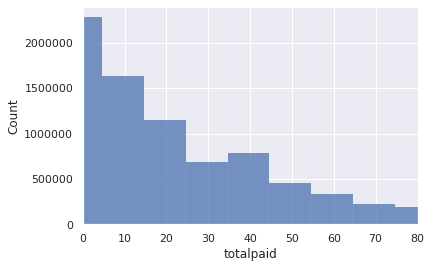

In [ ]:
sns.histplot(data=df['totalpaid'], binwidth=10).set_xlim(0, 80)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

# Cleaning/Wrangling

In [ ]:
nf = df
nf['numnights'] = nf['nights'].str[0] #add column 'numnights' to remove 'day'/'days' from 'nights'
nf['numnights'] = nf['numnights'].astype('int64', errors='ignore')

In [ ]:
nf = nf.drop(columns=['usefee','tranfee','attrfee']) #drop completely null columns
nf.head()

,historicalreservationid,ordernumber,agency,orgid,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,legacyfacilityid,...,discount,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,equipmentdescription,equipmentlength,numnights
0,edd9085a-a89f-4787-b9ec-e0794e5ac1b4,0201638440-1,BLM,126.00000,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.00000,...,0.00000,58.00000,2020-10-08 00:00:00.000,2020-10-10 00:00:00.000,2020-09-10 09:16:58.400,2 days,1.00000,NaN,0.00000,2
1,1d1d4d6a-3d57-47d0-9212-d9a4411555c0,0202157822-1,BLM,126.00000,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.00000,...,0.00000,33.00000,2020-10-23 00:00:00.000,2020-10-24 00:00:00.000,2020-09-28 23:22:18.538,1 day,2.00000,NaN,0.00000,1
2,bca72357-5824-4484-9eac-a824f5c00622,0208506393-1,BLM,126.00000,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.00000,...,0.00000,33.00000,2020-10-02 00:00:00.000,2020-10-03 00:00:00.000,2020-09-19 01:03:11.146,1 day,0.00000,NaN,0.00000,1
3,cbf1ce58-fb2a-4605-9474-cf27f1ce4052,0208506393-2,BLM,126.00000,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.00000,...,0.00000,25.00000,2020-10-03 00:00:00.000,2020-10-04 00:00:00.000,2020-09-19 01:03:11.146,1 day,2.00000,NaN,0.00000,1
4,b3e1899a-aa31-4948-8d47-29af5f6ea85f,0217769313-1,BLM,126.00000,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.00000,...,0.00000,18.00000,2020-10-10 00:00:00.000,2020-10-11 00:00:00.000,2020-09-16 19:57:02.020,1 day,0.00000,NaN,0.00000,1


I want to focus this exploration on specifically camping sites

## Filtered Values

I want to only study camping reservations from the national park service.

In [ ]:
isCamping = nf['inventorytype'] == 'CAMPING' #filter down to camping reservations
nf = nf[isCamping]
nf.shape

(4195809, 33)

In [ ]:
print(nf['agency'].value_counts()) #count of reservations under each agency

USFS     1564843
USACE    1437165
NPS      1122889
BLM        45522
BOR        19582
FWS         5554
Name: agency, dtype: int64


I want to focus on the National Park Service

In [ ]:
isNps = nf['agency'] == 'NPS' #filter down to National Park Service reservations
nf = nf[isNps]
nf.shape

(1122889, 33)

I want to view only reservations with a price greater than or equal to 0. From what I can tell, the negative transactions are refunds.

In [ ]:
isPos = nf['totalpaid'] >= 0 #total paid amount > 0
nf = nf[isPos]
nf.shape

(1122844, 33)

In [ ]:
notZero = nf['numberofpeople'] > 0 #number of people/reservation > 0
nf = nf[notZero]
nf.shape

(1120124, 33)

In [ ]:
print(nf['facilitystate'].value_counts()) #new list of top reserved states

California              287488
Utah                     99646
Wyoming                  83914
North Carolina           71363
Washington               71201
Arizona                  70050
Tennessee                63256
Colorado                 53843
Virginia                 36290
Texas                    35391
Michigan                 32275
Maryland                 31486
Florida                  28590
Maine                    26519
Montana                  18514
Kentucky                 14747
Indiana                   9157
Minnesota                 7269
Missouri                  6851
Arkansas                  6644
Mississippi               6190
Oklahoma                  6085
Georgia                   5660
Nevada                    4314
New Mexico                4012
South Carolina            2615
North Dakota              2600
District of Columbia      1988
Wisconsin                 1479
Hawaii                    1415
New Jersey                1216
Pennsylvania               519
Alaska  

## Null Values

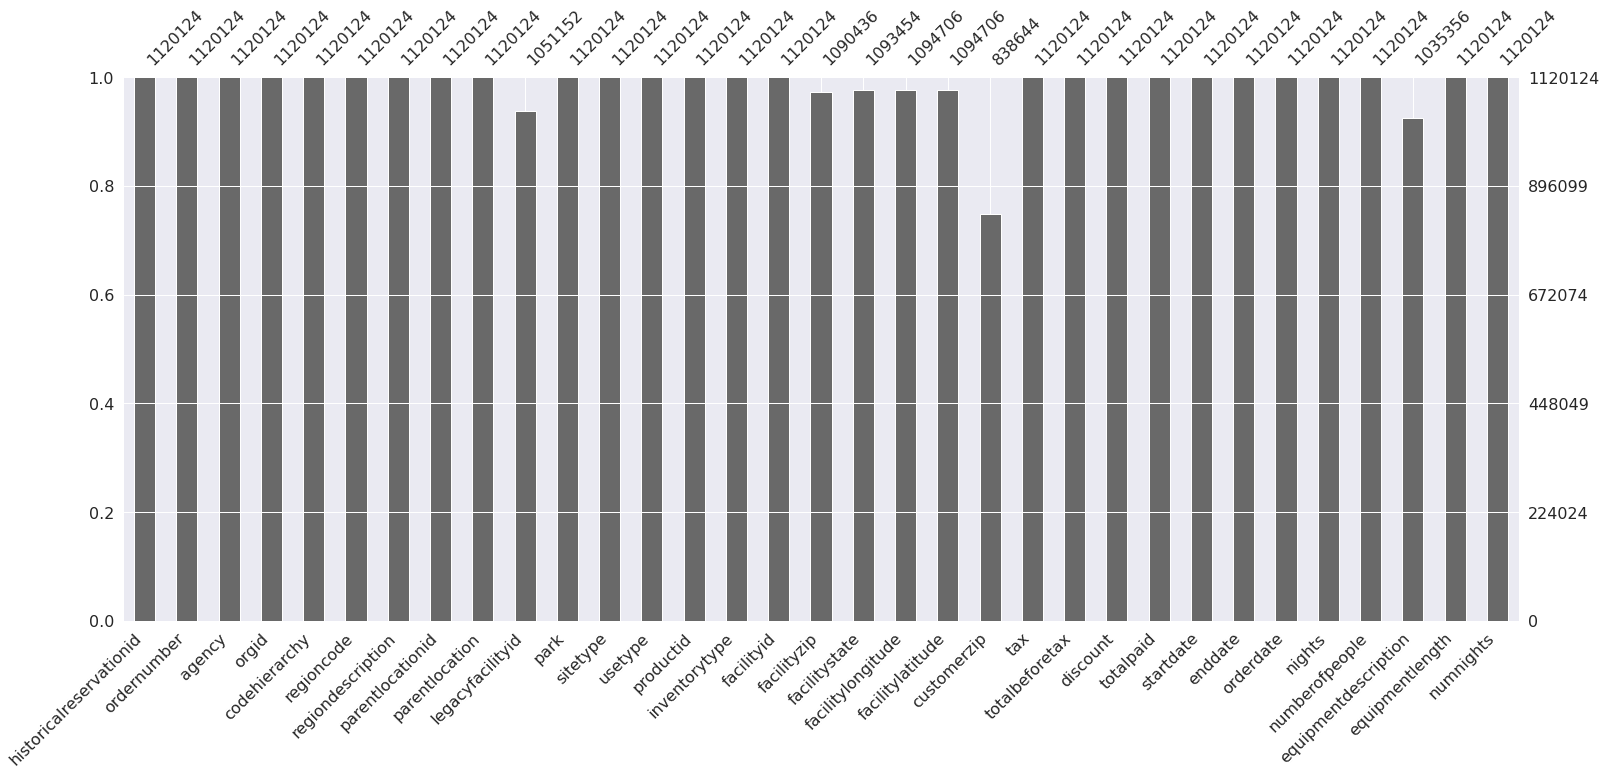

In [ ]:
msno.bar(nf) #charts the number/percent of complete values for each column

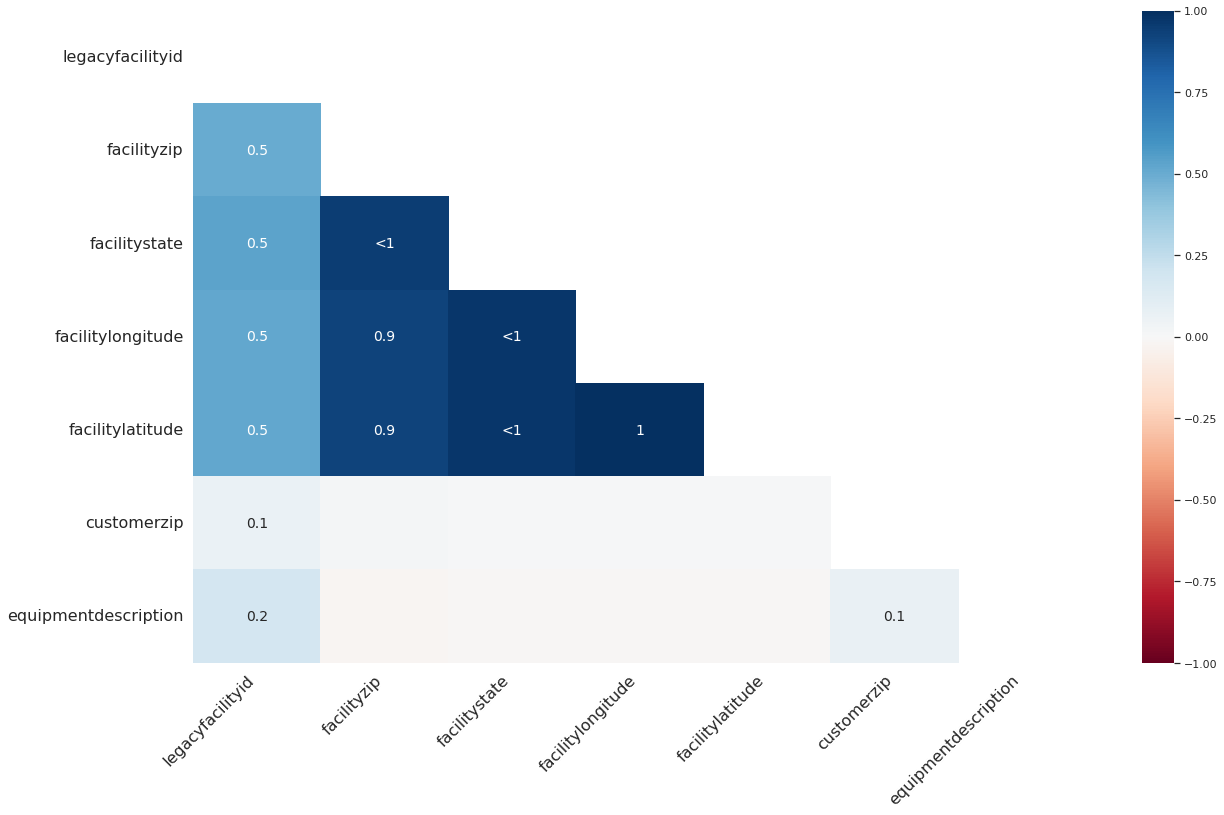

In [ ]:
msno.heatmap(nf) #correlation in presence of null values between each column

The heatmap above shows correlation in the presence of null values between each of the columns in the dataset. A value closer to 1 indicates a strong correlation in the presence of null values. This helps understand why some entries contain null values, and how to handle them in our processing of the data. For example, I can see that 'facilitylatitude' and 'facilitylongitude' have a positive correlation of 1, indicating that every record with null 'facilitylatitude' will also have null 'facilitylongitude'.

# Testing

## H1: signficant difference in average 'numberofpeople' observed in reservations made from the central region vs other regions

H1(0): there is no signficant difference in average 'numberofpeople' observed in reservations made from the central region vs other regions

In [ ]:
centralregion = ( (nf['customerzip'] >= '50000') & (nf['customerzip'] <= '79999')) #define central region by zipcodes 50000-79999
centralregiondf = nf.iloc[centralregion.values]
centralregiondf.dropna()
centralregiondf.shape



(119823, 33)

In [ ]:
otherregion = ((nf['customerzip'] <='49999') | (nf['customerzip'] >= '80000')) # define 'other' region by zipcodes <=49999 or >=80000
otherregiondf = nf.iloc[otherregion.values]
otherregiondf = otherregiondf.dropna()
otherregiondf.shape


(647140, 33)

In [ ]:
stats.ttest_ind(centralregiondf['numberofpeople'], otherregiondf['numberofpeople']) #t test between populations

Ttest_indResult(statistic=-17.312109533196292, pvalue=3.9258909946158914e-67)

In [ ]:
import math
def c95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    print("margin of error:")
    print(margin_of_error)
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(c95_ci(centralregiondf['numberofpeople'], otherregiondf['numberofpeople']))

margin of error:
0.02062123563047981
The difference in means at the 95% confidence interval (two-tail) is between 0.14315917614872253 and 0.18440164740968212.


[(0.0, 5.0)]

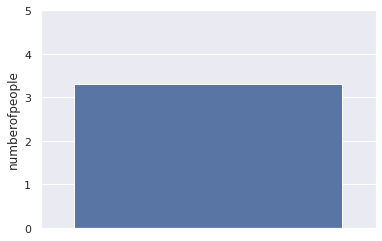

In [ ]:
sns.barplot(y='numberofpeople', data = (centralregiondf), ci=0.021).set(ylim=(0, 5)) #average number of people/reservation central region

[(0.0, 5.0)]

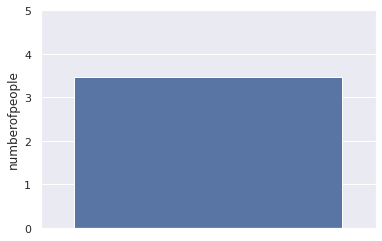

In [ ]:
sns.barplot(y='numberofpeople', data=otherregiondf, ci=0.021).set(ylim=(0, 5)) #average number of people/reservation outside central region

In [ ]:
print(centralregiondf.describe())
print(otherregiondf.describe())

             orgid  legacyfacilityid  facilityzip  facilitylongitude  \
count 119823.00000      109039.00000 118238.00000       118506.00000   
mean     128.00000      185526.05008  68546.75506         -101.19320   
std        0.00000      894271.84198  22102.52617           13.59310   
min      128.00000       70851.00000   2667.00000         -156.21841   
25%      128.00000       70971.00000  49839.00000         -112.12047   
50%      128.00000       74044.00000  79834.00000         -103.30417   
75%      128.00000       97219.00000  84532.00000          -88.79552   
max      128.00000    10124953.00000  99664.00000            0.00000   

       facilitylatitude          tax  totalbeforetax     discount  \
count      118506.00000 119823.00000    119823.00000 119823.00000   
mean           38.02925      0.60098        43.62203     -5.26225   
std             6.11895      2.93884        51.07878     19.02071   
min             0.00000      0.00000        -6.00000   -320.00000   
25%   

## H2: Significant difference in average 'totalprice' observed in reservations made in California vs other regions

H2(0): No significant difference in average 'totalprice' observed in reservations made in California vs other regions

In [ ]:
ca = (nf['facilitystate'] == 'California') #make new data frame containing california reservations
ca = nf.iloc[ca.values]
ca = ca.dropna()

In [ ]:
otherstate = (nf['facilitystate'] != 'California') #new data frame containing not california reservations
otherstate = nf.iloc[otherstate.values]
otherstate = otherstate.dropna()

In [ ]:
stats.ttest_ind(ca['totalpaid'], otherstate['totalpaid']) #t test to test difference in average totalpaid


Ttest_indResult(statistic=-66.34573738929012, pvalue=0.0)

In [ ]:
c95_ci(ca['totalpaid'], otherstate['totalpaid']) # calculate the 95 percend confidence interval

margin of error:
0.1963334830960746


'The difference in means at the 95% confidence interval (two-tail) is between 7.307007318885896 and 7.699674285078045.'

[(0.0, 45.0)]

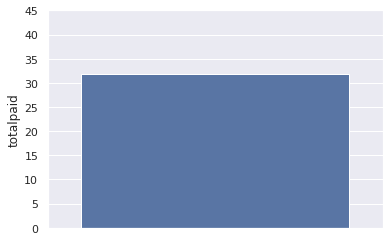

In [ ]:
sns.barplot(y='totalpaid', data=ca, ci=0.196).set(ylim=(0, 45)) #plot average total paid in california

[(0.0, 45.0)]

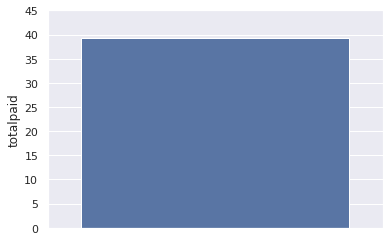

In [ ]:
sns.barplot(y='totalpaid', data=otherstate, ci=0.196).set(ylim=(0, 45)) #plot average total paid outside california

In [ ]:
ca.describe() #key stats for california rentals


,orgid,legacyfacilityid,facilityzip,facilitylongitude,facilitylatitude,tax,totalbeforetax,discount,totalpaid,numberofpeople,equipmentlength
count,219037.00000,219037.00000,219037.00000,219037.00000,219037.00000,219037.00000,219037.00000,219037.00000,219037.00000,219037.00000,219037.00000
mean,128.00000,596480.85551,93952.80311,-118.87632,36.47742,0.58919,33.94489,-2.47667,31.84870,3.73637,19.20307
std,0.00000,2193973.12680,1393.46155,2.04394,1.85472,2.92952,36.57230,10.52340,35.38115,2.46268,3631.14163
min,128.00000,70924.00000,90704.00000,-122.97500,33.47985,0.00000,0.00000,-281.50000,0.00000,1.00000,0.00000
25%,128.00000,70941.00000,92328.00000,-119.66500,34.12000,0.00000,10.00000,0.00000,10.00000,2.00000,0.00000
50%,128.00000,70980.00000,93633.00000,-118.96533,36.60671,0.00000,25.00000,0.00000,22.00000,3.00000,0.00000
75%,128.00000,74186.00000,95389.00000,-116.86778,37.73611,0.00000,44.00000,0.00000,44.00000,6.00000,16.00000
max,128.00000,10124502.00000,96088.00000,-115.82500,40.62556,77.40000,800.00000,0.00000,800.00000,60.00000,1212130.00000


In [ ]:
otherstate.describe() #key stats for not california rentals

,orgid,legacyfacilityid,facilityzip,facilitylongitude,facilitylatitude,tax,totalbeforetax,discount,totalpaid,numberofpeople,equipmentlength
count,528558.00000,528558.00000,528558.00000,528558.00000,528558.00000,528558.00000,528558.00000,528558.00000,528558.00000,528558.00000,528558.00000
mean,128.00000,161674.44709,64286.59656,-100.30644,39.04375,0.69596,44.62031,-5.94509,39.35204,3.28881,3346.45063
std,0.00000,737469.33308,28036.83843,15.95730,5.13228,3.65284,53.36557,19.25494,47.77868,3.08736,1643984.78906
min,128.00000,70851.00000,4645.00000,-155.43084,25.85139,0.00000,-6.00000,-546.00000,0.00000,1.00000,0.00000
25%,128.00000,70968.00000,37738.00000,-112.12047,36.03894,0.00000,17.50000,0.00000,10.00000,2.00000,0.00000
50%,128.00000,73985.00000,81146.00000,-108.73286,37.74465,0.00000,30.00000,0.00000,25.00000,2.00000,0.00000
75%,128.00000,111991.00000,84767.00000,-83.77667,43.84077,0.00000,54.00000,0.00000,48.00000,4.00000,21.00000
max,128.00000,10101374.00000,99613.00000,-68.06836,58.66950,652.08000,5928.00000,90.00000,6580.08000,150.00000,1110110110.00000


CA average paid: 31.84870 </br>
Other states average paid: 39.35204	</br>

Difference in average total paid: $7.50 </br></br>

Result: Reject the null

# Results

1. Central US region has statistically 0.16385 fewer people per reservation. While this is not a large amount, it could be good to keep in mind when looking for other causal factors.

2. California rentals have an average total paid price $7.50 lower than the average reservation in the other US states.

# Recommendations

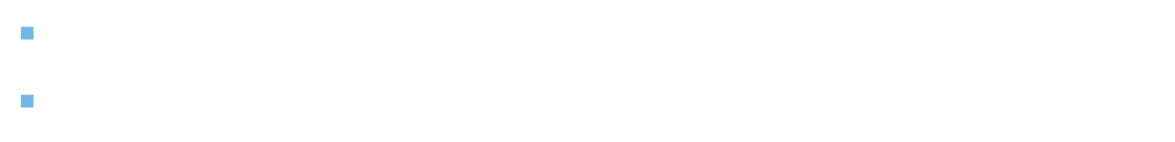

Previous Years' data can be accessed at recreation.gov. This information could help discover trends in camper behavior in order to predict future needs.